<h1>機械学習の仕組みを体感すべく、単純パーセプトロンのコードを書いてアヤメのデータ(がくの長さと花弁の長さのデータを使用)を分析しました。</h1>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h3>以下データの下処理</h3>

In [ ]:
#アヤメのデータを読み込み
df = pd.read_csv('datas/iris-data.csv', header = None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [ ]:
#がくの長さのデータを抽出
df_sepal = df.iloc[:, 0]
df_sepal

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
     ... 
95    5.7
96    5.7
97    6.2
98    5.1
99    5.7
Name: 0, Length: 100, dtype: float64

In [ ]:
#花弁の長さのデータを抽出
df_petal = df.iloc[:, 2]
df_petal

0     1.4
1     1.4
2     1.3
3     1.5
4     1.4
     ... 
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: 2, Length: 100, dtype: float64

In [ ]:
#品種名の列を抽出
df_name = df.iloc[:, 4]
df_name

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
           ...       
95    Iris-versicolor
96    Iris-versicolor
97    Iris-versicolor
98    Iris-versicolor
99    Iris-versicolor
Name: 4, Length: 100, dtype: object

In [ ]:
#ダミー関数
df_dummie = pd.get_dummies(df_name)
df_dummie

,Iris-setosa,Iris-versicolor
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
95,0,1
96,0,1
97,0,1
98,0,1


In [ ]:
#Iris-setosaを1、Iris-versicolorを0とした
df_cla = df_dummie.iloc[:, 0]
df_cla

0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: Iris-setosa, Length: 100, dtype: uint8

In [ ]:
#重み更新に用いるための列を作成
df_one = np.ones(100)
df_one = pd.Series(df_one)
df_one

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
95    1.0
96    1.0
97    1.0
98    1.0
99    1.0
Length: 100, dtype: float64

In [ ]:
#額の長さ、花弁の長さ、重み計算用の列データを統合
df_length = pd.concat([df_sepal, df_petal, df_one], axis=1, ignore_index=True)
df_length

,0,1,2
0,5.1,1.4,1.0
1,4.9,1.4,1.0
2,4.7,1.3,1.0
3,4.6,1.5,1.0
4,5.0,1.4,1.0
...,...,...,...
95,5.7,4.2,1.0
96,5.7,4.2,1.0
97,6.2,4.3,1.0
98,5.1,3.0,1.0


In [ ]:
#上記テーブルデータをnumpy.arrayに変換
df_length = df_length.to_numpy()
df_length = df_length.tolist()
df_length

[[5.1, 1.4, 1.0],
 [4.9, 1.4, 1.0],
 [4.7, 1.3, 1.0],
 [4.6, 1.5, 1.0],
 [5.0, 1.4, 1.0],
 [5.4, 1.7, 1.0],
 [4.6, 1.4, 1.0],
 [5.0, 1.5, 1.0],
 [4.4, 1.4, 1.0],
 [4.9, 1.5, 1.0],
 [5.4, 1.5, 1.0],
 [4.8, 1.6, 1.0],
 [4.8, 1.4, 1.0],
 [4.3, 1.1, 1.0],
 [5.8, 1.2, 1.0],
 [5.7, 1.5, 1.0],
 [5.4, 1.3, 1.0],
 [5.1, 1.4, 1.0],
 [5.7, 1.7, 1.0],
 [5.1, 1.5, 1.0],
 [5.4, 1.7, 1.0],
 [5.1, 1.5, 1.0],
 [4.6, 1.0, 1.0],
 [5.1, 1.7, 1.0],
 [4.8, 1.9, 1.0],
 [5.0, 1.6, 1.0],
 [5.0, 1.6, 1.0],
 [5.2, 1.5, 1.0],
 [5.2, 1.4, 1.0],
 [4.7, 1.6, 1.0],
 [4.8, 1.6, 1.0],
 [5.4, 1.5, 1.0],
 [5.2, 1.5, 1.0],
 [5.5, 1.4, 1.0],
 [4.9, 1.5, 1.0],
 [5.0, 1.2, 1.0],
 [5.5, 1.3, 1.0],
 [4.9, 1.5, 1.0],
 [4.4, 1.3, 1.0],
 [5.1, 1.5, 1.0],
 [5.0, 1.3, 1.0],
 [4.5, 1.3, 1.0],
 [4.4, 1.3, 1.0],
 [5.0, 1.6, 1.0],
 [5.1, 1.9, 1.0],
 [4.8, 1.4, 1.0],
 [5.1, 1.6, 1.0],
 [4.6, 1.4, 1.0],
 [5.3, 1.5, 1.0],
 [5.0, 1.4, 1.0],
 [7.0, 4.7, 1.0],
 [6.4, 4.5, 1.0],
 [6.9, 4.9, 1.0],
 [5.5, 4.0, 1.0],
 [6.5, 4.6, 1.0],
 [5.7, 4.5

In [ ]:
#もとのデータの列名を以下のように変更
pd.set_option('display.max_rows', 10)
df.columns = ['setal_length', 'setal_width', 'pepal_length', 'pepal_width', 'name']
df

,setal_length,setal_width,pepal_length,pepal_width,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [ ]:
#確認用のグラフ作成のために別途データを抽出(iris-setosa)
df_setosa = df.iloc[:50, :]
df_setosa_setal_length = df_setosa.iloc[:, 0]
df_setosa_petal_length = df_setosa.iloc[:, 2]
df_setosa_setal_length.to_numpy()
df_setosa_petal_length.to_numpy()

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [ ]:
#確認用のグラフ作成のために別途データを抽出(iris-versicolor)
df_versicolor = df.iloc[50:100, :]
df_versicolor_setal_length = df_versicolor.iloc[:, 0]
df_versicolor_petal_length = df_versicolor.iloc[:, 2]
df_versicolor_setal_length.to_numpy()
df_versicolor_petal_length.to_numpy()

array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

<h3>以下本題の単純パーセプトロンのコード及びその結果</h3>

1/100 epoch.
error 11
2/100 epoch.
error 3
3/100 epoch.
error 3
4/100 epoch.
error 2
5/100 epoch.
error 2
6/100 epoch.
error 1
7/100 epoch.
error 0
weight[-0.0570000000000001, -0.049999999999999906, 0.41999999999999993]


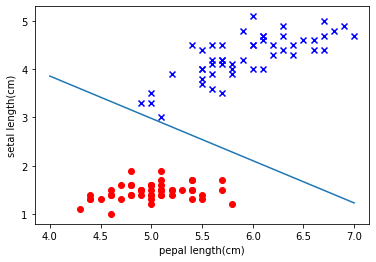

In [ ]:

#学習率
eta = 0.01
# weight = np.random.rand(3)
#重み初期値
weight = [0.5, 0.5, 0.5]

epoch = 100
counter = 0
y = []

#行列計算
def inputs(data, weight):
  # print(np.dot(data, weight))
  return np.dot(data, weight)


def output(data, weight):
  return step(inputs(data, weight))

#活性化関数
def step(train):
  if train <=0:
    x = 0
  else:
    x = 1
  # print(x)
  return x

#誤差
def error(ans, out):
  # print(ans)
  return ans - out

#重みの更新
def update(weight, err, data):
  for n in range(len(data)):
     weight[n] += eta * e * data[n]   
  return weight


#学習
for i in range(epoch):
  counter = 0
  for row in range(len(df_cla)): 
    e = error(df_cla[row], output(df_length[row], weight))
    #間違えた個数を記録
    if e != 0:
      counter += 1
    # print(e)
    update(weight, e, df_length[row])
  #100回ごとに間違えた個数を表示
  print(i+1, "/", epoch, " epoch.", sep='')
  print("error", counter)
  if counter == 0:
    break
#重みの最終結果
print("weight", weight, sep='')


#グラフ描写
#最終的な重みを用いて算出したステップ関数の数値ごとに分類したもの
for row in range(len(df_length)):
  # print(df_length[row])
  n = output(df_length[row], weight)
  if n == 1:
    plt.scatter(df_length[row][0], df_length[row][1], c = "red", marker = 'o')
  else:
    plt.scatter(df_length[row][0], df_length[row][1], c = "blue", marker = 'x')

#境界線
x = (4, 7)
for c in x:
  y.append(-((weight[1]/weight[0])*c + (weight[2]/weight[0])))


#グラフ出力
plt.plot(x, y)
plt.xlabel("pepal length(cm)")
plt.ylabel("setal length(cm)");

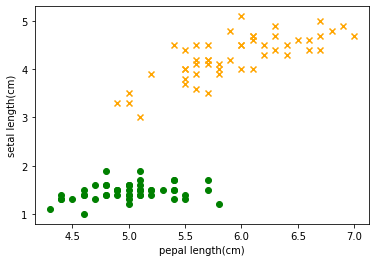

In [ ]:
#元データをラベルごとに分類したもの
plt.scatter(df_setosa_setal_length, df_setosa_petal_length, color='green')
plt.scatter(df_versicolor_setal_length, df_versicolor_petal_length, color='orange', marker='x')
plt.xlabel("pepal length(cm)")
plt.ylabel("setal length(cm)");